<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW3_%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Преобразуйте данные:**

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('athletes.csv')

In [ ]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [ ]:
#Очищаем от пропусков
df = df[~(df['dob'].isna())]
df = df[~(df['height'].isna())]
df = df[~(df['weight'].isna())]

In [ ]:
df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [ ]:
df_1 = df.drop(['id', 'dob', 'name'], axis=1)
df_1.head()

,nationality,sex,height,weight,sport,gold,silver,bronze
0,ESP,male,1.72,64.0,athletics,0,0,0
1,KOR,female,1.68,56.0,fencing,0,0,0
2,CAN,male,1.98,79.0,athletics,0,0,1
3,MDA,male,1.83,80.0,taekwondo,0,0,0
4,NZL,male,1.81,71.0,cycling,0,0,0


In [ ]:
X = pd.get_dummies(df_1, columns=['nationality', 'sport'])
del X['sex']
X.head()

,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['sex'])
y = pd.Series(data=le.transform(df_1['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

#**2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict_proba(X_test)

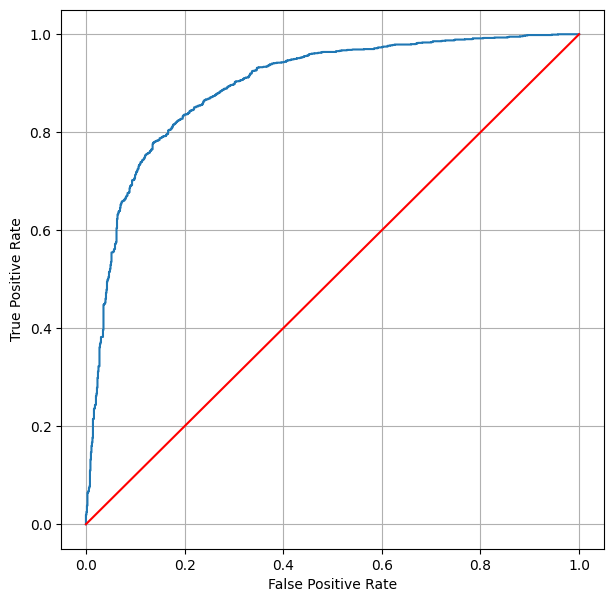

In [ ]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0.0, 1.0], 'r-')
plt.grid()

#**4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.893162228655115

#**5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [ ]:
import numpy as np

In [ ]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative
tpr1 = np.array([])
fpr1 = np.array([])
precision1 = np.array([])
thresholds = np.arange(1, 0, -0.05)
for i in thresholds:
  for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= i:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
  tpr1 = np.concatenate((tpr1, np.array([tp / (tp + fn)])), axis=0)
  fpr1 = np.concatenate((fpr1, np.array([fp / (fp + tn)])), axis=0)
  try:
    precision1 = np.concatenate((precision1, np.array([tp / (tp + fp)])), axis=0)
  except:
    precision1 = np.concatenate((precision1, np.array([1])), axis=0)
  tp = 0
  fp = 0
  fn = 0
  tn = 0

#**6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.**

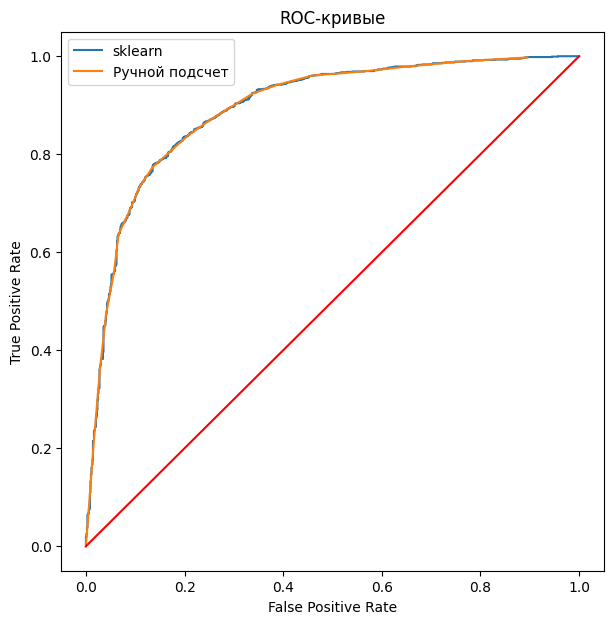

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='sklearn')
plt.plot(fpr1, tpr1, label='Ручной подсчет')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0.0, 1.0], 'r-')
plt.legend(loc=0)
plt.title('ROC-кривые')
plt.show()

#**7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.**

Text(0.5, 1.0, 'Precision-Recall')

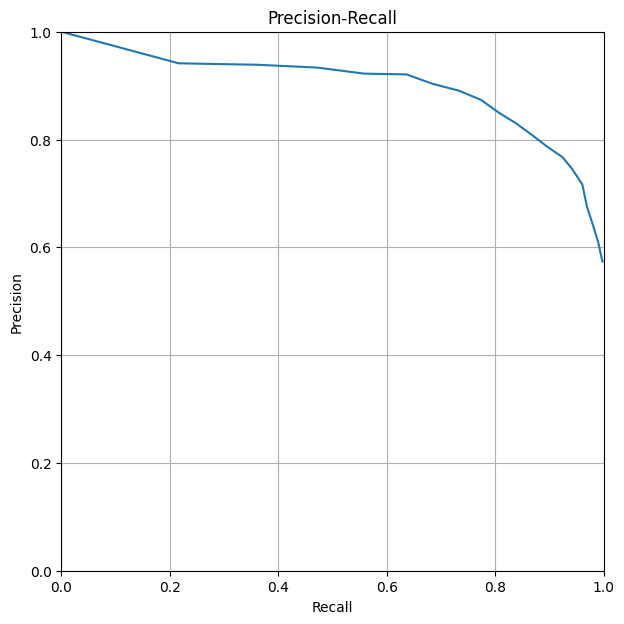

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(tpr1, precision1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Precision-Recall')

#**8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п.5.**

In [ ]:
np.trapz(tpr1, fpr1)

0.7886439770332048

#**9. Сформулируйте выводы по проделанной работе:**

**a. Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**

С точки зрения качества более мелкий шаг sklern позволяет добиться большей метрики ROC-AUC

Правильный подбор пороговых значений позволяет добиться оптимально высоких значений полноты и точности (судя по графику на уровне 0,8 для обоих показателей)

**b. *может ли ROC-кривая проходить ниже диагонали?**

Прямо под саму диагональ наверно нет, всеравно слишком высокий или низкий порог линию заведет за диагональ. Но при определенных значениях линия может заходить за диагнональ, для этого ей одновременно нужно в более 50% случаев ошибаться и с positive, и c negative. Пример ниже



In [ ]:
df_2 = df.drop(['id', 'dob', 'name', 'dob', 'height', 'weight', 'gold', 'silver', 'nationality'], axis=1)
df_2.head()

,sex,sport,bronze
0,male,athletics,0
1,female,fencing,0
2,male,athletics,1
3,male,taekwondo,0
4,male,cycling,0


In [ ]:
X1 = pd.get_dummies(df_2, columns=['sport'])
del X1['sex']
X1.head()

,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
le.fit(df_2['sex'])
y1 = pd.Series(data=le.transform(df_2['sex']))

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.01, random_state=6)
model_ = LogisticRegression()
model_.fit(X1_train, y1_train)
model_.score(X1_test, y1_test)

0.45871559633027525

In [ ]:
predictions_ = model_.predict_proba(X1_test)

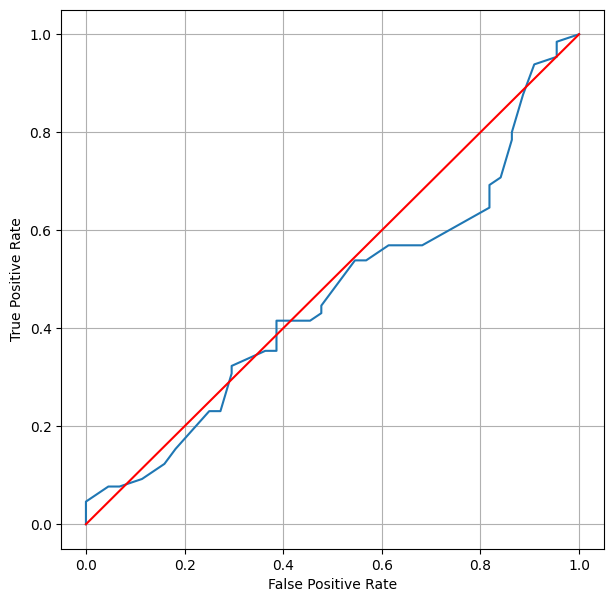

In [ ]:
plt.figure(figsize=(7, 7))
fpr, tpr, thres = roc_curve(y1_test, predictions_[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0.0, 1.0], 'r-')
plt.grid()